# Linear Classifiers

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

The above code is for compatibility with Python 2. If you are using Python 3 (recommended), you may ignore this.

In [2]:
import tensorflow as tf

We must import the tensorflow package to be able to use it! We use the alias "tf" to avoid having to type out the full name every time.

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

This is a helper function that will allow us to load the data.

In [4]:
dataset = unpickle('data_batch_1')
dataset.keys()

dict_keys([b'batch_label', b'filenames', b'labels', b'data'])

We see that the data is stored in a dictionary (a data structure in Python). We are interested in the labels and the data.

In [5]:
dataset[b'data'].shape

(10000, 3072)

There are 10000 images in this "batch", and each is stored in an array of length 3072. Why is this? Hint: The images are 32x32  
Let's plot a random image!

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

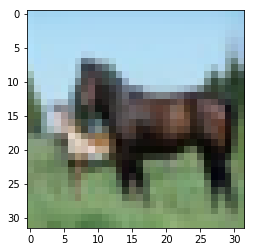

In [7]:
# pick a random number between 0 and 9999
random = 12
img = dataset[b'data'][random].reshape(3,32,32).transpose(1,2,0)
plt.imshow(img);

In [8]:
print(dataset[b'labels'][:100])

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1]


These are the first 100 labels - they are stored as a list of numbers between 0 and 9, where each number corresponds to a class.

In [9]:
label_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
label_names[dataset[b'labels'][random]]

'horse'

In [10]:
input_length = 3072
num_classes = 10

Here, we declare all our inputs, outputs, and parameters.

In [58]:
x = tf.placeholder(tf.float32, [None, input_length], name='x')
y = tf.placeholder(tf.int64, [None, num_classes], name='y')
W = tf.Variable(tf.truncated_normal([input_length, num_classes]), name='W')
b = tf.Variable(tf.truncated_normal([num_classes]), name='b')

In [60]:
scores = tf.matmul(x, W) + b
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=scores))
pred = tf.nn.softmax(scores)

In [62]:
correct = tf.equal(tf.argmax(pred, axis=1), tf.argmax(y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

Notice that we have to set our learning rate in advance!

In [63]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)
init = tf.global_variables_initializer()

We will want to one-hot encode our labels - this means that each label will be a vector with a 1 in the place of the correct label, and 0s everywhere else.

In [64]:
import numpy as np

In [65]:
labels = np.array(dataset[b'labels'])
encoded_labels = np.zeros((10000, num_classes)).astype(int)
encoded_labels[np.arange(10000), labels] = 1

In [66]:
print(labels[0])
print(encoded_labels[0])

6
[0 0 0 0 0 0 1 0 0 0]


In [85]:
training = dataset[b'data']
n_batches = 20
x_train = np.array_split(training, n_batches)
y_train = np.array_split(encoded_labels, n_batches)
n_epochs = 100

In [90]:
sess = tf.InteractiveSession()

In [91]:
sess.run(init)
for j in range(n_epochs):
    total_loss = 0
    total_accuracy = 0
    for i in range(n_batches):
        results = sess.run([optimizer, loss, accuracy], feed_dict={x:x_train[i], y:y_train[i]})
        total_loss += results[1]
        total_accuracy += results[2]
    if j%10 == 9:
        print('epoch', '{:3}'.format(j+1), ': loss=' + '{:6}'.format(str(int(total_loss/n_batches))), 
              'accuracy=' + str(round(total_accuracy/n_batches, 4)))

epoch  10 : loss=70704  accuracy=0.2118
epoch  20 : loss=64626  accuracy=0.2245
epoch  30 : loss=60993  accuracy=0.2438
epoch  40 : loss=62253  accuracy=0.235
epoch  50 : loss=50250  accuracy=0.2612
epoch  60 : loss=56264  accuracy=0.26
epoch  70 : loss=57664  accuracy=0.2604
epoch  80 : loss=52318  accuracy=0.2711
epoch  90 : loss=55341  accuracy=0.2769
epoch 100 : loss=60652  accuracy=0.2532


Generate some predictions!

Prediction: horse


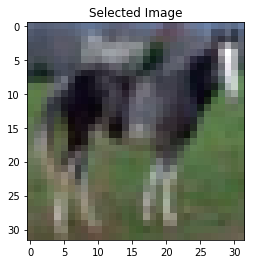

In [111]:
random = 37
sample = training[random]
plt.imshow(sample.reshape(3,32,32).transpose(1,2,0));
plt.title('Selected Image')

print('Prediction:', label_names[sess.run(tf.argmax(pred, axis=1), feed_dict={x:[sample]})[0]])